In [1]:
from stable_baselines3.common.evaluation import evaluate_policy
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_checker import check_env
import torch
import datetime

C:\Users\josen\anaconda3\envs\gpu2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Env 

### Instance Creation

In [3]:
run trading_env_v1

In [4]:
env = stockMEnv(len_eps=110, window_size = 18, initCash = 20, max_transactions=20, eps_type='signal')

### Env Check

In [39]:
check_env(env)

info {'total_reward': -3.5417393630148664, 'volume': 'err', 'action': 1}


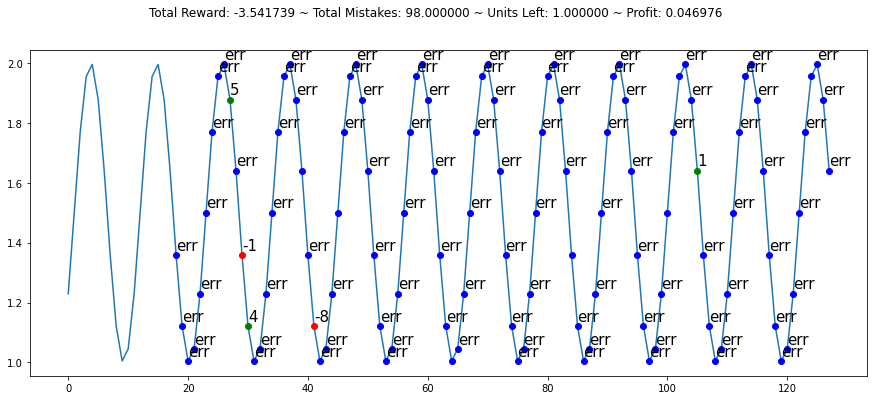

In [5]:
#Try running one episode randomly
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
env.render()
plt.show()

In [6]:
env = Monitor(env, allow_early_resets=True) # it is used to know the episode reward, length, time and other data.
env = DummyVecEnv([lambda:env])
# Vectorized Environments are a method for stacking multiple independent environments into a single environment. 
# Instead of training an RL agent on 1 environment per step, it allows us to train it on n environments per step. 
# Because of this, actions passed to the environment are now a vector (of dimension n). It is the same for observations, 
# rewards and end of episode signals (dones).

In [7]:
eval_env = stockMEnv(len_eps=110, window_size=18,initCash = 20, max_transactions=20, eps_type='signal', mode = 'ev')
eval_env = Monitor(eval_env, allow_early_resets=True) 
eval_env = DummyVecEnv([lambda:eval_env])

# Model Training

In [8]:
current_dir = 'C:/Users/josen/OneDrive/Documentos/jupyter/'
version = 'exp'
tensorboard_PPO_log = current_dir+'tb_logs/'+version
model_log = current_dir+'md_logs/'+version+'/'

In [37]:
PPO_model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=tensorboard_PPO_log, policy_kwargs=dict(optimizer_class=torch.optim.Adam, 
optimizer_kwargs=dict(eps=1e-4),net_arch=[dict(pi=[512,512,512,512,512],vf=[512,512,512,512,512])]), batch_size=256,seed=2, learning_rate=0.0001, device='cuda')

Using cpu device


In [38]:
time_steps=200000
for i in range(10):
    PPO_model.learn(time_steps, reset_num_timesteps=False, tb_log_name = "PPO", log_interval = 4)  
    #evaluate(PPO_model, eval_env, n_eval_episodes=10, deterministic=False,return_episode_rewards=True)
    #PPO_model.save(model_log+str(int((i+1)*time_steps/1000))+'k')

Logging to C:/Users/josen/OneDrive/Documentos/jupyter/tb_logs/exp\PPO_0
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 110          |
|    ep_rew_mean          | 4.2          |
| time/                   |              |
|    fps                  | 489          |
|    iterations           | 4            |
|    time_elapsed         | 16           |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 0.0138924755 |
|    clip_fraction        | 0.152        |
|    clip_range           | 0.2          |
|    entropy_loss         | -3.7         |
|    explained_variance   | 0.559        |
|    learning_rate        | 0.0001       |
|    loss                 | 0.362        |
|    n_updates            | 30           |
|    policy_gradient_loss | -0.0228      |
|    value_loss           | 0.664        |
------------------------------------------
-------------------------

KeyboardInterrupt: 

# Evaluation

In [ ]:
time_steps=200000
i = 14
PPO_model = PPO_model.load(model_log+str(int((i+1)*time_steps/1000))+'k',env=env)

In [ ]:
run trading_env_multistock_v1

In [ ]:
#eval_env = stockMEnv(frame_bound=(5,16), window_size=3, initCash = 5, max_transactions=10,eps_noise_level=2,penalty=0.01, wallet_in_obs=True, mode = 'evaluate')
eval_env = stockMEnv(, window_size=3, initCash = 5, max_transactions = 10,eps_noise_level=0,penalty=0.1,wallet_in_obs=True,mode = 'evaluate')
eval_env = Monitor(eval_env, allow_early_resets=True) # it is used to know the episode reward, length, time and other data.
eval_env = DummyVecEnv([lambda:eval_env])

In [ ]:
PPO_model = PPO('MlpPolicy', eval_env, verbose = 1, policy_kwargs=dict(optimizer_class=torch.optim.Adam, optimizer_kwargs=dict(eps=1e-4)),
            seed=2, learning_rate=0.00001, device='cuda')

([168.269645,
  154.773444,
  162.258405,
  168.269645,
  168.269645,
  104.734038,
  168.269645,
  139.564823,
  168.269645,
  138.965152],
 [110, 110, 110, 110, 110, 110, 110, 110, 110, 110])

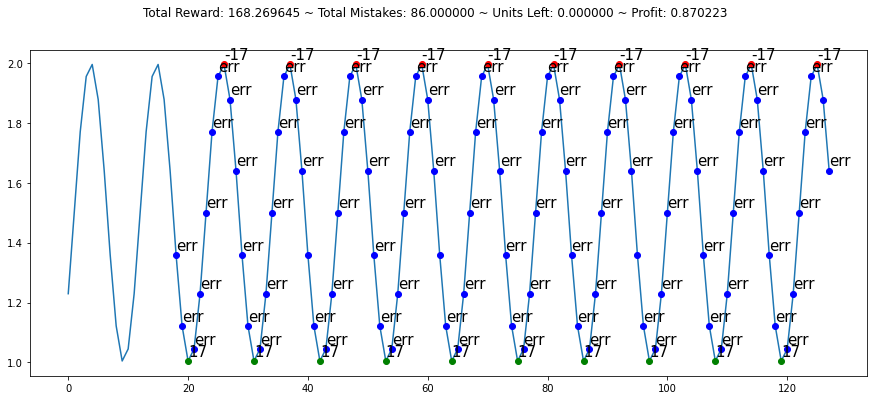

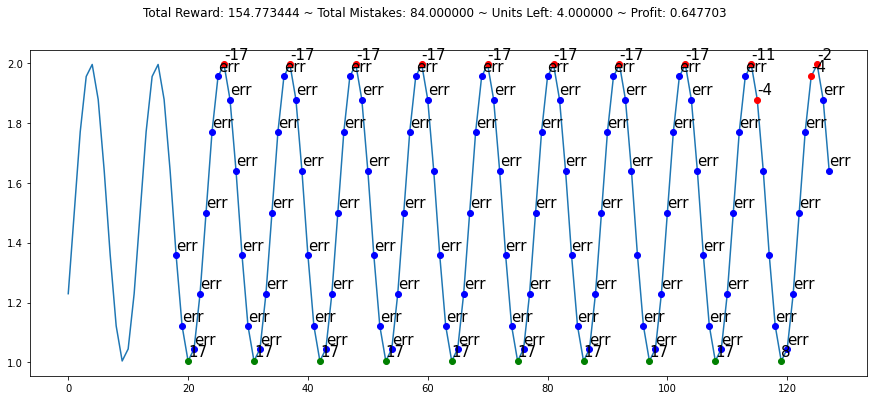

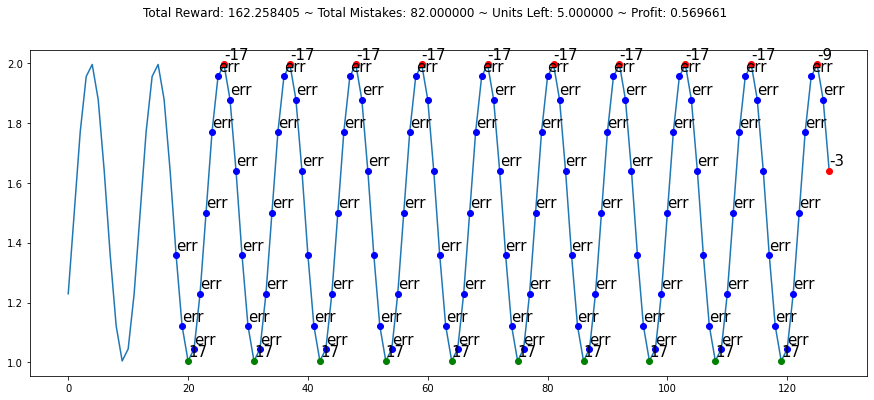

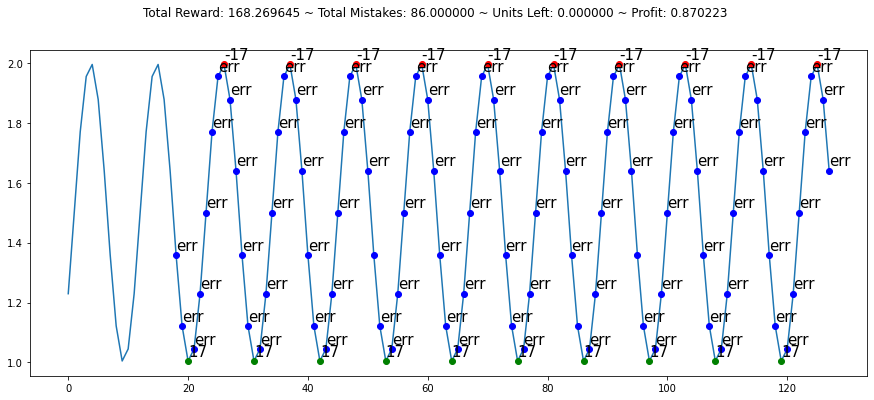

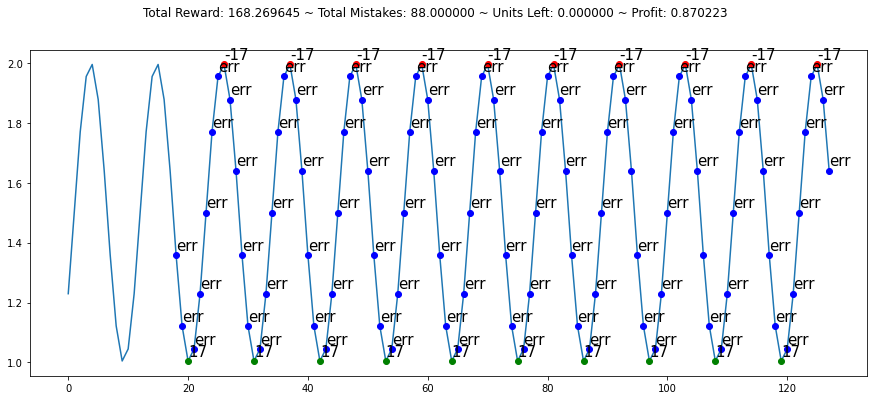

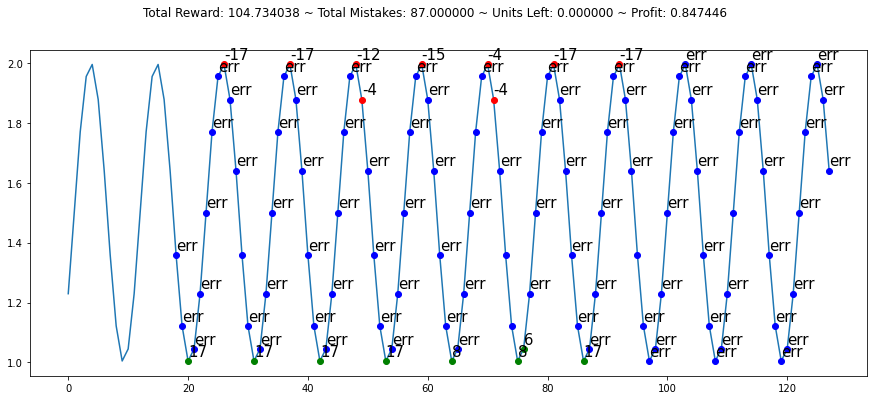

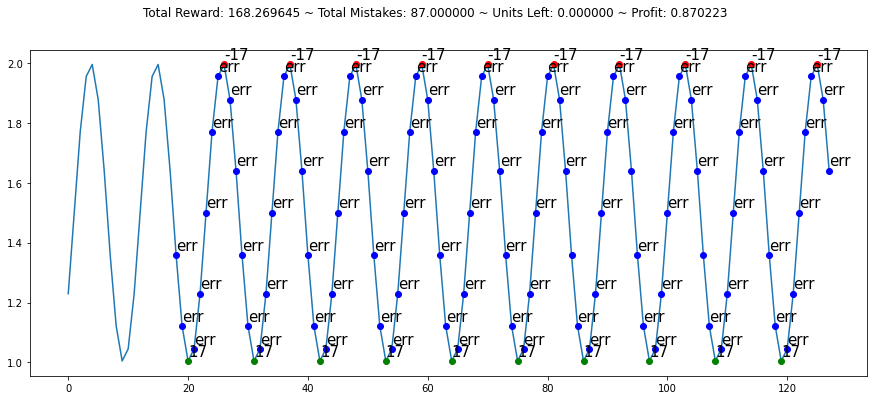

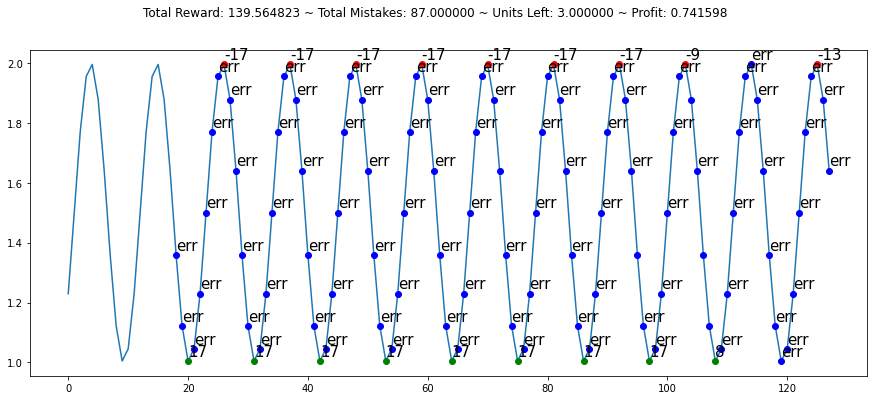

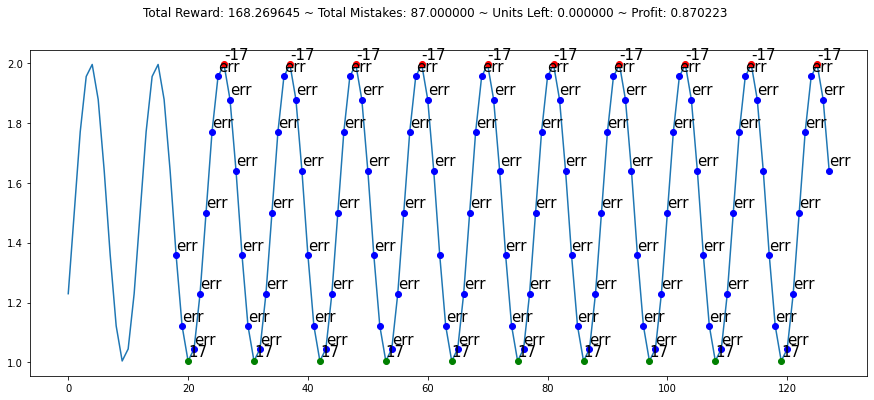

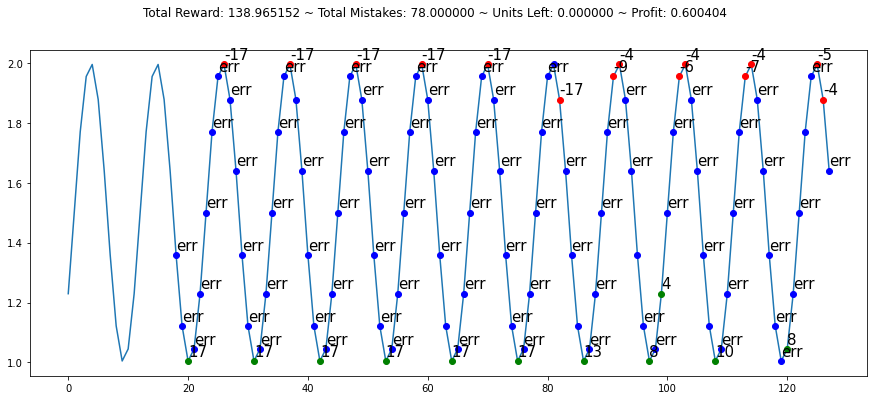

In [185]:
#env0 signal tune1 len11
evaluate_policy(PPO_model, eval_env, deterministic=False,return_episode_rewards=True)

In [ ]:
#env0 signal tune2 len55
evaluate_policy(PPO_model, eval_env, deterministic=False,return_episode_rewards=True)

In [ ]:
#env0 signal tune3 len110
evaluate_policy(PPO_model, eval_env, deterministic=False,return_episode_rewards=True)

In [ ]:
#env0 changing_signal tune3 len110(reward a dividir pela amp_const*(len_eps/11))
evaluate_policy(PPO_model, eval_env, n_eval_episodes=10, deterministic=False,return_episode_rewards=True)

In [ ]:
#env0 noisy tune3 len110(reward a dividir pela média do eps)
evaluate_policy(PPO_model, eval_env, deterministic=False,return_episode_rewards=True)

In [ ]:
#5 diff phases
evaluate_policy(PPO_model, eval_env, n_eval_episodes=10, deterministic=False,return_episode_rewards=True)

In [ ]:
#2 diff amps and phases
evaluate_policy(PPO_model, eval_env, n_eval_episodes=10, deterministic=False,return_episode_rewards=True)

In [ ]:
#3 diff amps and phases
evaluate_policy(PPO_model, eval_env, n_eval_episodes=10, deterministic=False,return_episode_rewards=True)

In [ ]:
#5 diff amps and phases
evaluate_policy(PPO_model, eval_env, n_eval_episodes=10, deterministic=False,return_episode_rewards=True)

In [ ]:
#ic5_fb5to27_mt10_eps_noise_level1_ws10_wioTrue
evaluate_policy(PPO_model, eval_env, n_eval_episodes=10, deterministic=False,return_episode_rewards=True)

In [ ]:
#ic5_mt10_p001_eps_noise_level1_wioTrue
evaluate_policy(PPO_model, eval_env, n_eval_episodes=10, deterministic=False,return_episode_rewards=True)

In [ ]:
#ic5_fb5to27_mt10_p001_eps_noise_level1_wioTrue
evaluate_policy(PPO_model, eval_env, n_eval_episodes=10, deterministic=False,return_episode_rewards=True)

In [ ]:
#ic5_mt10_eps_noise_level2_wioTrue
evaluate_policy(PPO_model, eval_env, n_eval_episodes=10, deterministic=False,return_episode_rewards=True)

In [ ]:
#ic5_mt10_fb5to27_eps_noise_level2_wioTrue
evaluate_policy(PPO_model, eval_env, n_eval_episodes=10, deterministic=False,return_episode_rewards=True)

In [ ]:
#ic5_fb5to27_mt10_eps_noise_level2_ws6_wioTrue
evaluate_policy(PPO_model, eval_env, n_eval_episodes=10, deterministic=False,return_episode_rewards=True)

In [ ]:
#ic5_fb5to27_mt10_eps_noise_level2_ws10_wioTrue
evaluate_policy(PPO_model, eval_env, n_eval_episodes=10, deterministic=False,return_episode_rewards=True)

In [ ]:
#ic5_mt10_p001_eps_noise_level2_wioTrue
evaluate_policy(PPO_model, eval_env, n_eval_episodes=10, deterministic=False,return_episode_rewards=True)

In [ ]:
#ic5_fb5to27_mt10_p001_eps_noise_level2_wioTrue
evaluate_policy(PPO_model, eval_env, n_eval_episodes=10, deterministic=False,return_episode_rewards=True)

In [ ]:
!tensorboard dev upload \
  --logdir tensorboard_PPO_log \
  --name "PPO flexsell initcash=1, max_transact = 1 penalty = 0.5 (5,16)" \
  --description "PPO anytrading tune for ondas" \
  --one_shot